In [46]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

import sklearn.datasets as ds

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [47]:
## 设置属性防止中文乱码及拦截异常信息
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

##### 1.1、产生模拟数据

In [48]:
N = 1000   # 1000样本数
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]   # 4中心点
data1, y1 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,0.75, 0.5,0.25), random_state=0)

data1 = StandardScaler().fit_transform(data1)   # 归一化

##### 1.2、产生圆形模拟数据

In [49]:
t = np.arange(0, 2 * np.pi, 0.1)   # 形成0-2pai的一串数据，用于形成圆形数据
data2_1 = np.vstack((np.cos(t), np.sin(t))).T   # 形成环形数据，cos(t)为x坐标，sin(t)为y坐标。注意不是圆形数据
data2_2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data2_3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data2 = np.vstack((data2_1, data2_2, data2_3))   # 形成三环数据
y2 = np.vstack(([0] * len(data2_1), [1] * len(data2_2), [2] * len(data2_3))).reshape(-1)   # 以0，1，2分别标识data2_1、data2_2、data2_3

##### 1.3、合并数据

In [50]:
params1 = ((0.15, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))
params2 = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

datasets = [(data1, y1,params1), (data2, y2,params2)]   # 拼接数据，用于for循环。 （数据，标签，参数）

In [51]:
def expandBorder(a, b):   # 坐标系拓展
    d = (b - a) * 0.1
    return a-d, b+d

—— DBSCAN(eps=eps, min_samples=min_samples)   # 构建模型
#eps：半径，控制邻域的大小，值越小，越容易获得分类，分类数目也越多；值越大，越容易将分类合并；
#min_samples：M值，初始簇中最多数据样本个数，值越小，越容易获得分类，也越可以容忍噪声点；值越大，越容易产生噪音点

类别: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] ；聚类簇数目: 16
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2] ；聚类簇数目: 3
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


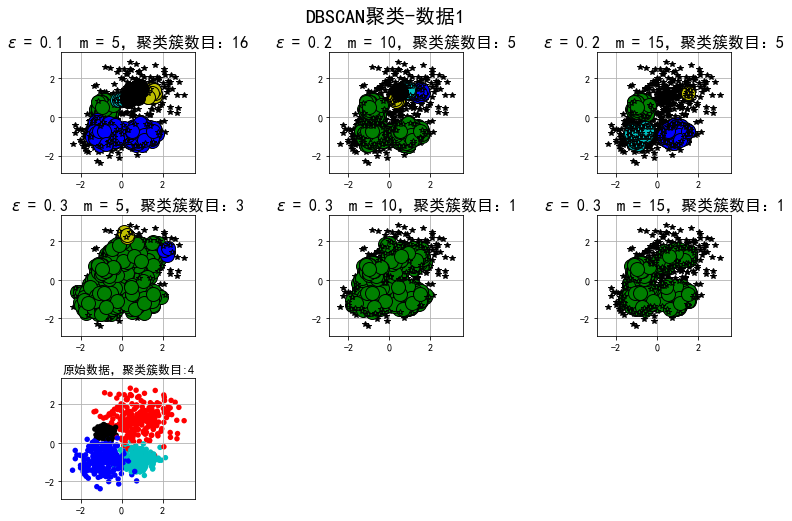

类别: [0 1 2] ；聚类簇数目: 3
类别: [-1  0  1] ；聚类簇数目: 2
类别: [-1  0] ；聚类簇数目: 1
类别: [0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


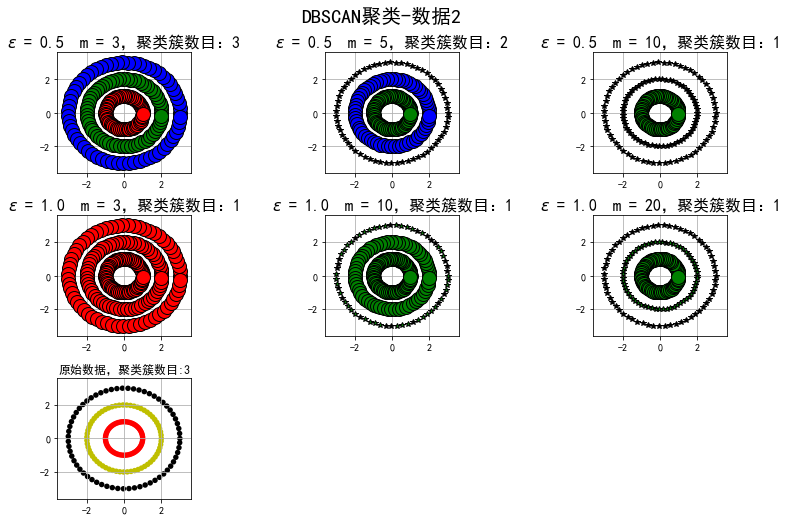

In [65]:
colors = ['r', 'g', 'b', 'y', 'c', 'k']
cm = mpl.colors.ListedColormap(colors)

for i,(X, y, params) in enumerate(datasets):
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1_min, x1_max = expandBorder(x1_min, x1_max)
    x2_min, x2_max = expandBorder(x2_min, x2_max)
    
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle('DBSCAN聚类-数据%d' % (i+1), fontsize=20)
    plt.subplots_adjust(top=0.9,hspace=0.35,wspace=1 )   # 调整子图
    
    for j,param in enumerate(params):
        eps, min_samples = param
        model = DBSCAN(eps=eps, min_samples=min_samples)   # 构建模型
        model.fit(X)   # 模型训练
        y_hat = model.labels_   # 获取标签

        unique_y_hat = np.unique(y_hat)   # 唯一化标签，以获得标签类型数目
        n_clusters = len(unique_y_hat) - (1 if -1 in y_hat else 0)   # 删去-1标签（噪音点）：在密度聚类中，将没有被分的噪声点归为了-1类别
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
        
        core_samples_mask = np.zeros_like(y_hat, dtype=bool)   # zeros_like()：返回与给定数组的形状和类型相同的零数组(或bool数组，以False为默认值)
        core_samples_mask[model.core_sample_indices_] = True   # model.core_sample_indices_()：返回核心样本在原始训练集中的位置     
        
        ## 开始画图
        plt.subplot(3,3,j+1)
        for k, col in zip(unique_y_hat, colors):
            if k == -1:
                col = 'k'   # 将-1标签类型设置为黑色
                
            class_member_mask = (y_hat == k)   # 样本分类
            xy = X[class_member_mask & core_samples_mask]   # 核心样本
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)   # 绘制核心样本点所属分类（圆）
                                                                                    # 用大markersize来表示大密度类型
            xy = X[class_member_mask & ~core_samples_mask]   # 非核心样本
            plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=col, markeredgecolor='k', markersize=6)   # 绘制非核心样本点所属分类（圆）
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title('$\epsilon$ = %.1f  m = %d，聚类簇数目：%d' % (eps, min_samples, n_clusters), fontsize=16)
        
    ## 原始数据显示
    plt.subplot(3,3,7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title('原始数据，聚类簇数目:%d' % len(np.unique(y)))
    plt.grid(True)
    plt.show()